**Naive bayes implementation from scratch**

In [47]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [60]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        #empty matrix for parameters 
        self._mean = np.zeros((n_classes, n_features))
        self._var = np.zeros((n_classes, n_features))
        self._priors = np.zeros(n_classes)
        #calculation mean var for priro(P(Y)) each class 
        for i, c in enumerate(self.classes):
            class_sample = X[y == c]
            self._mean[i, :] = class_sample.mean(axis=0)
            self._var[i, :] = class_sample.var(axis=0)
            self._priors[i] = class_sample.shape[0] / float(n_samples)
    def predict(self, X):
        y_pred=[]
        for x in X:
          posteriors = []
          # calculate posterior probability for each class
          for i, c in enumerate(self.classes):
              prior = np.log(self._priors[i])
              posterior = np.sum(np.log(self._pdf(i, x)))
              posterior = posterior + prior
              posteriors.append(posterior)
          y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)
    #gaussian distribtuion
    def _pdf(self, i, x):
        return np.exp(-np.power(x - self._mean[i], 2.) / (2 * self._var[i])) / (2*np.pi*self._var[i])**0.5

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy 

In [62]:
df = pd.read_csv("Breast_cancer_data.csv")
y=df["diagnosis"].values
X=df[df.columns.drop('diagnosis')].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

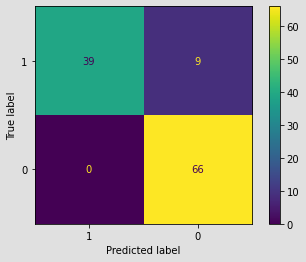

Naive Bayes classification accuracy 0.9210526315789473
Precision score: 0.88
Recall score: 1.0


In [65]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])

cm_display.plot()
plt.show()

print("Naive Bayes classification accuracy", accuracy(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

**Naive bayes classifier implementation with sklearn python**

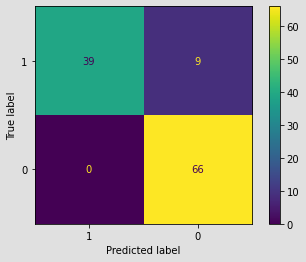

Naive Bayes classification accuracy 0.9210526315789473
Precision score: 0.88
Recall score: 1.0


In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])

cm_display.plot()
plt.show()
print("Naive Bayes classification accuracy", accuracy(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

Optimal bayes classifer
